# Create map pickles

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import warnings
warnings.filterwarnings('ignore')
import time
from matplotlib.patches import Polygon 
import matplotlib.image as mpimg

%matplotlib notebook

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

In [4]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

### Mn model surface map

In [40]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -57, -57, \
                -125.5, -124.5, -106.5, -149.5]
lat_features1 = [88, 79, 78, \
                66.1, 65.5, 65.2, 77.5]

<IPython.core.display.Javascript object>


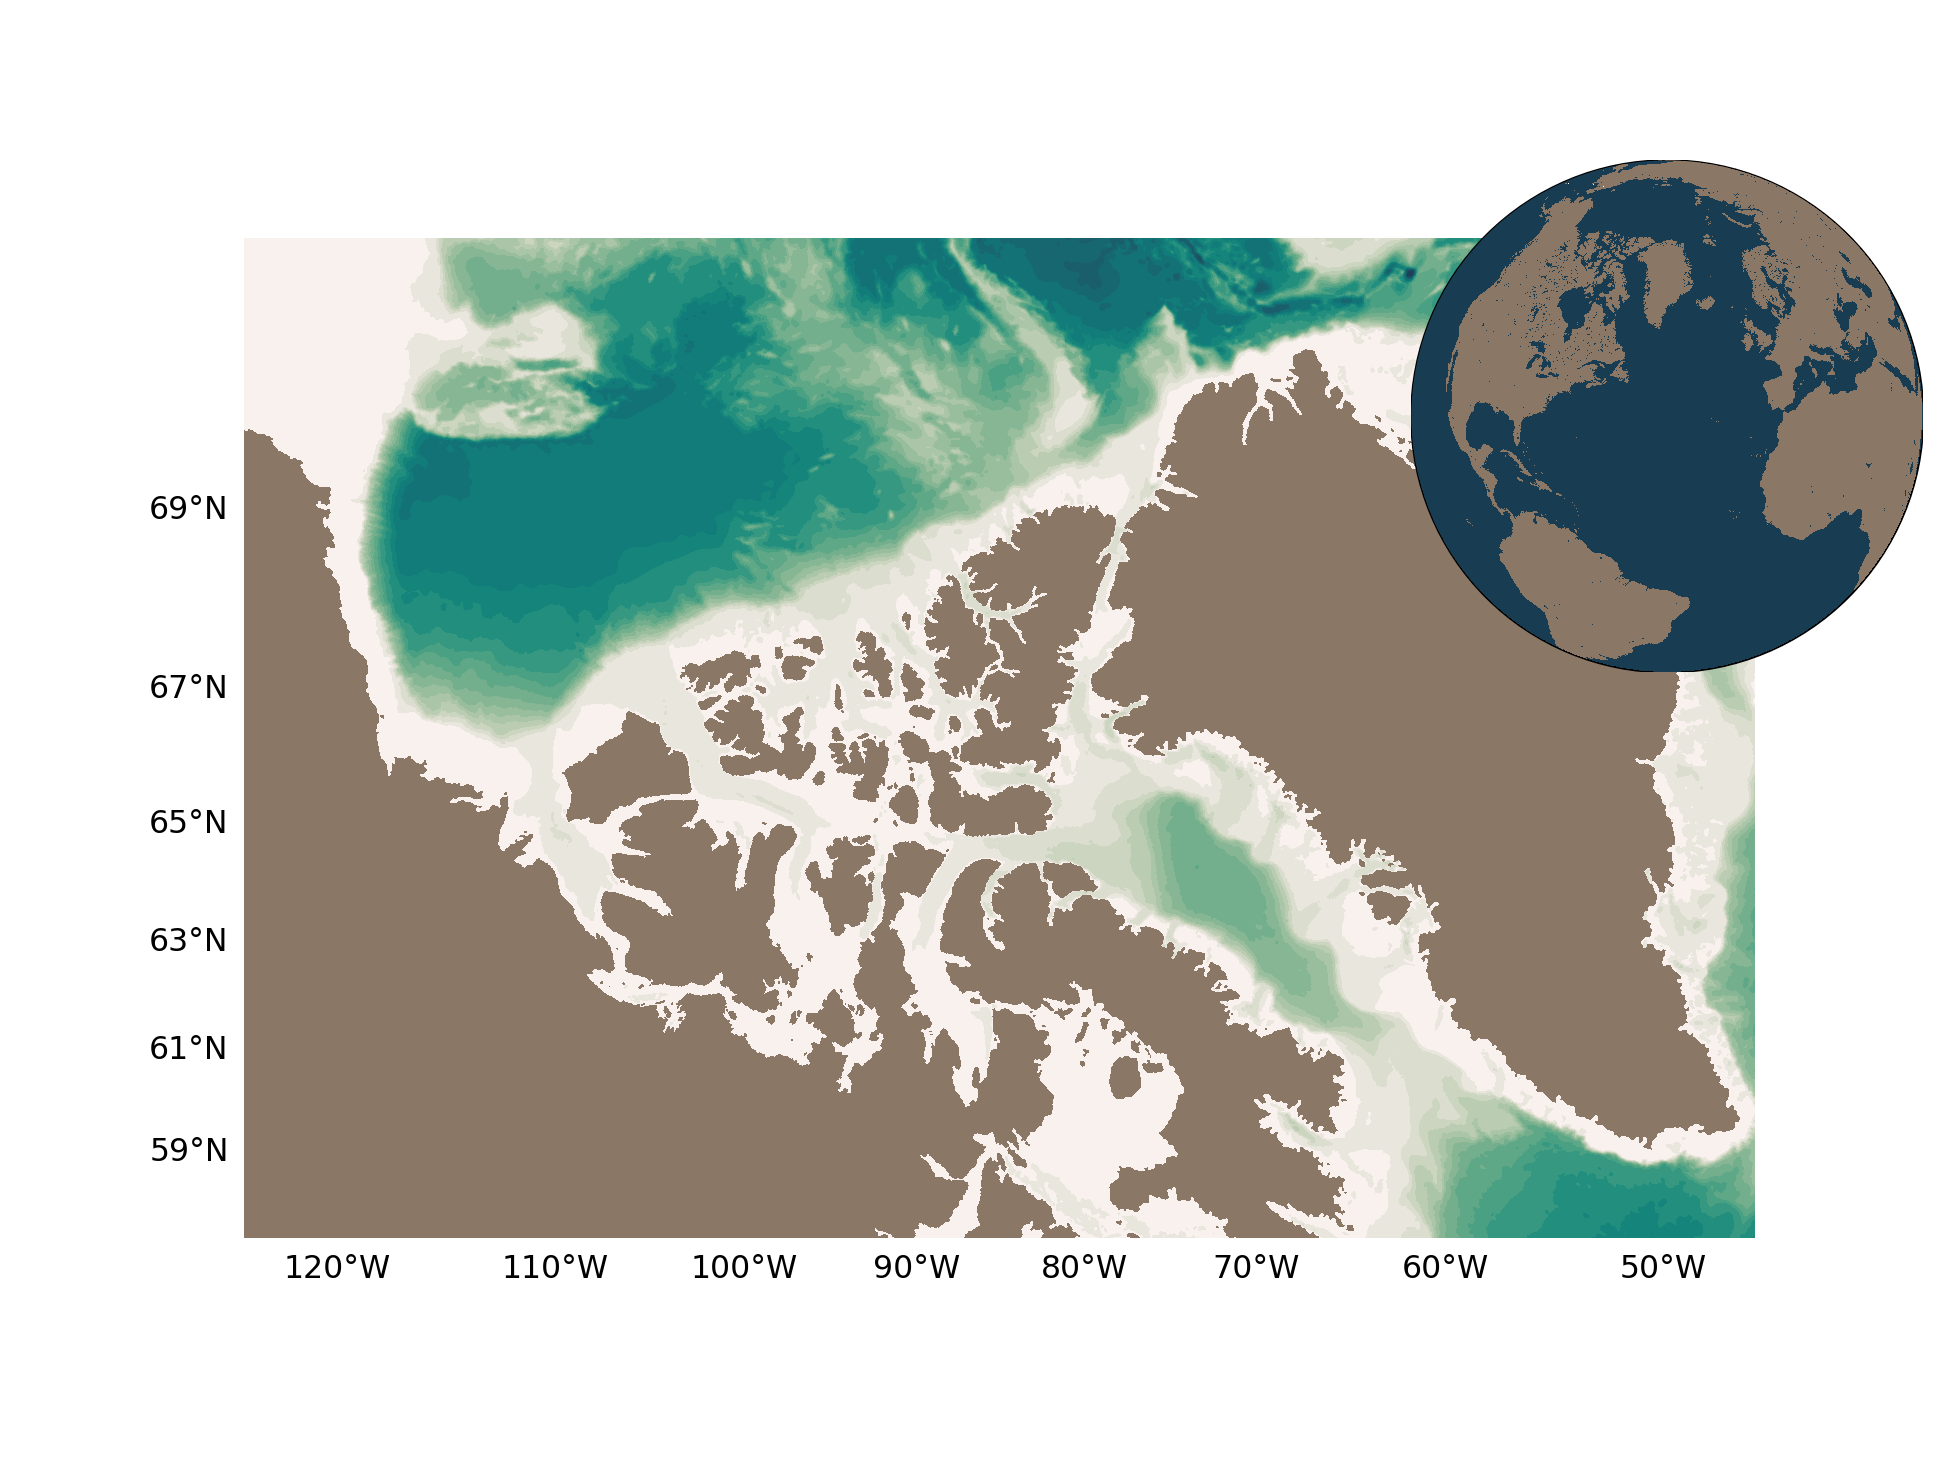

In [66]:
fig, ax1 = plt.subplots(figsize=(12,9))

# proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax1)
proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

# nv = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/nunavut.png')
# nwt = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/NWT.png')

# ax3 = fig.add_axes([0.36, 0.16, 0.06, 0.04]) #nunavut
# ax3.axis('off')
# ax3.imshow(nv)
# ax4 = fig.add_axes([0.13, 0.29, 0.10, 0.04]) #northwest territories
# ax4.axis('off')
# ax4.imshow(nwt)

# # features:
# textx, texty = proj1(lon_features1, lat_features1)
# for i in range(len(features)):
#     if features[i] == 'Kalaallit Nunaat':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='w', zorder=4)
#     elif features[i] == 'Beaufort Sea':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='k', zorder=4)
#     else:
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic', color='w',\
#                 zorder=4)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('surface-land-map-globe.pickle','wb'))

<IPython.core.display.Javascript object>


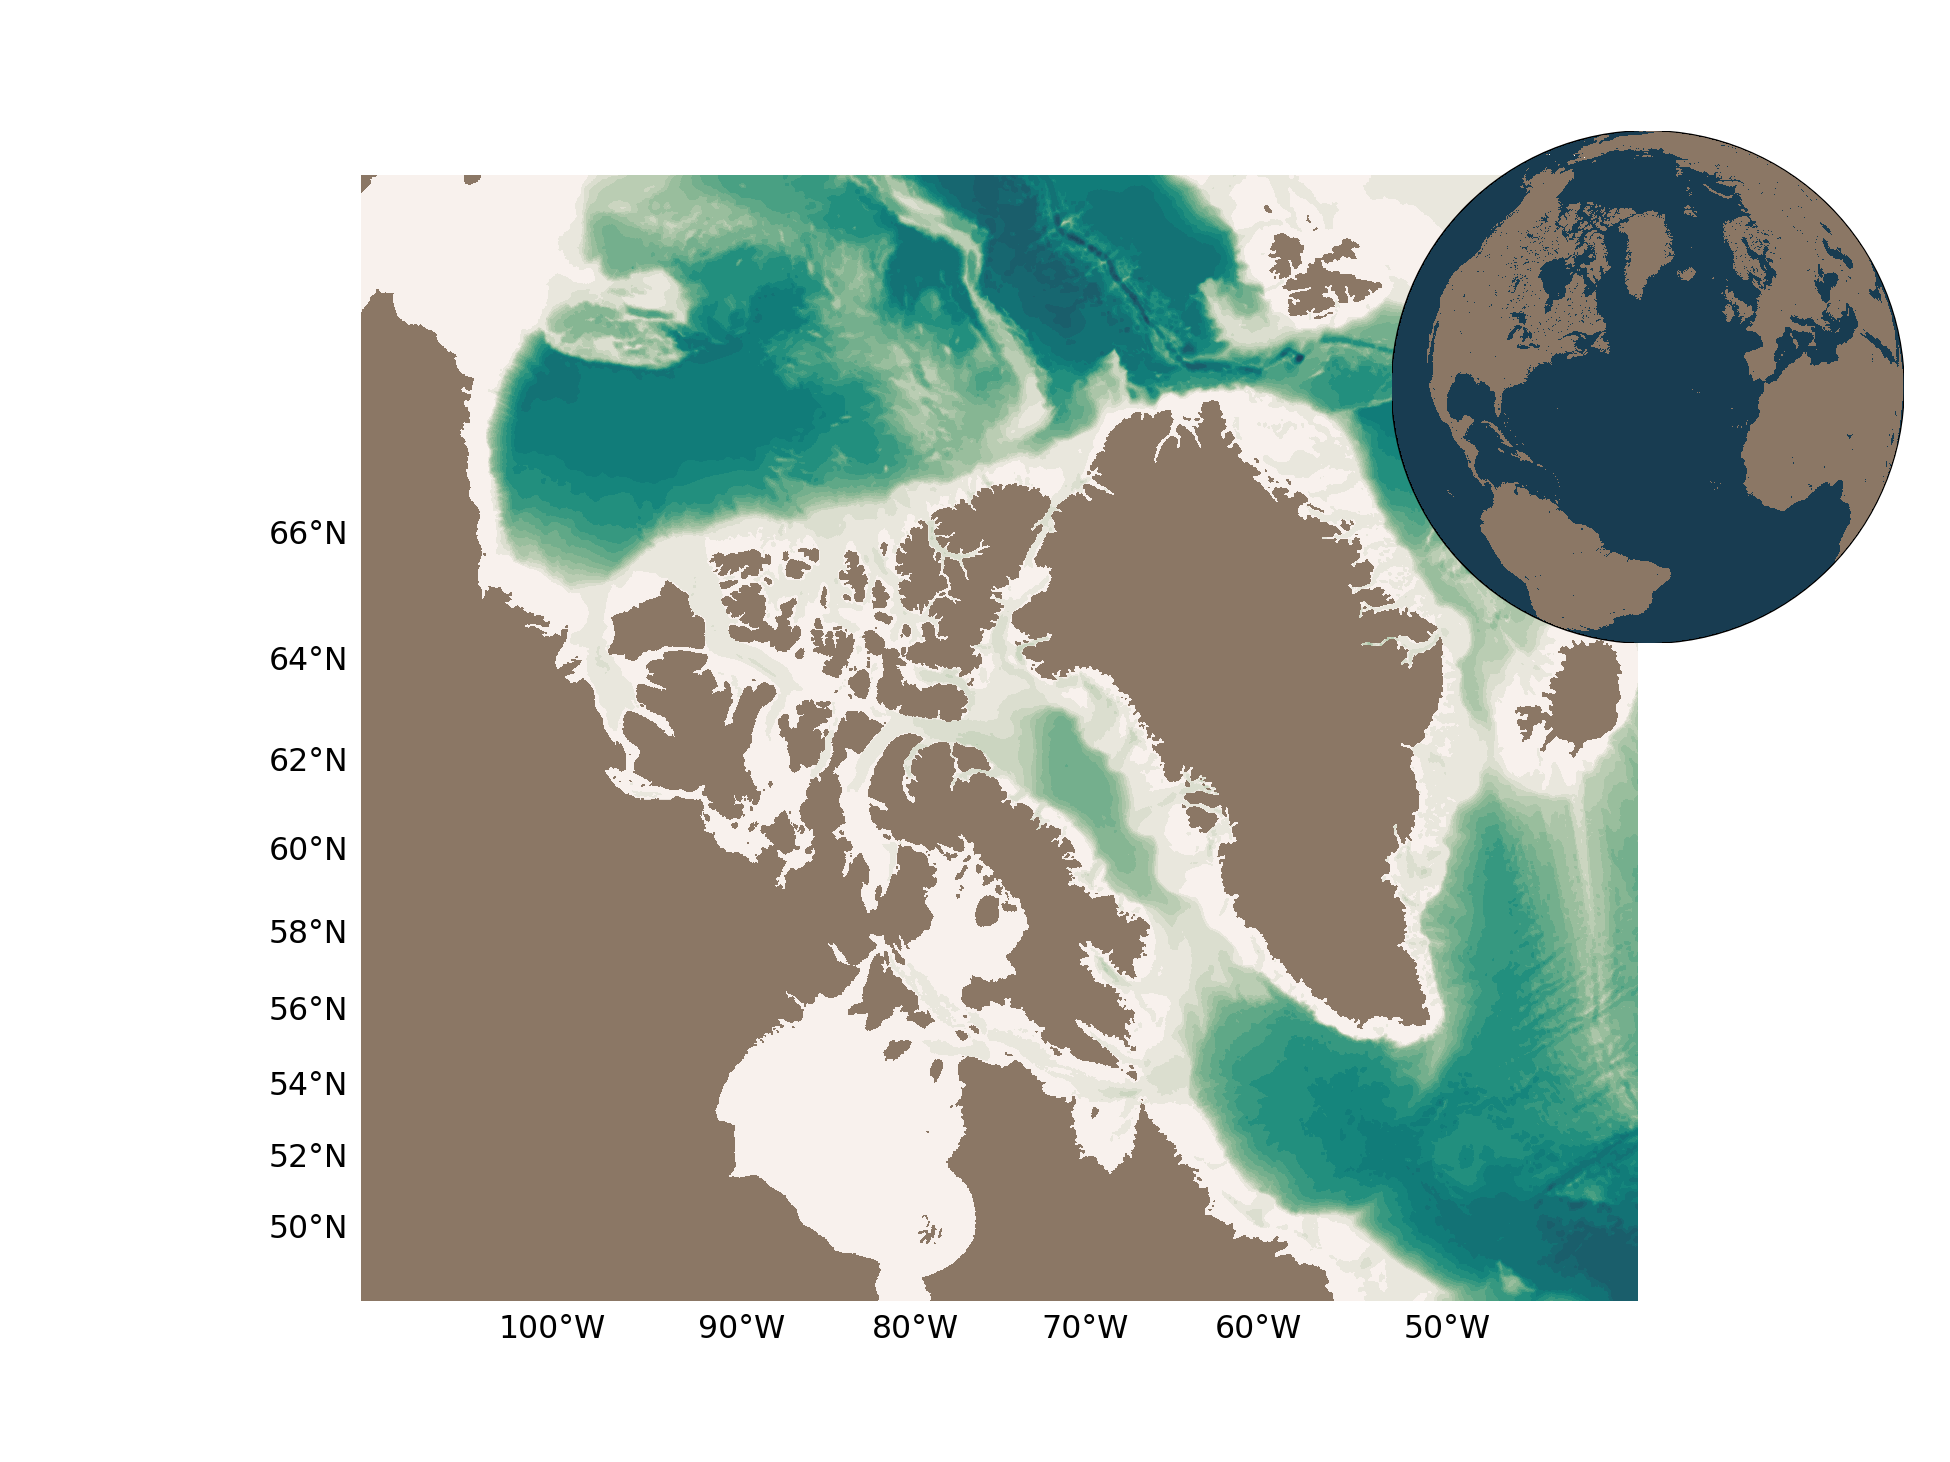

In [16]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1=Basemap(projection='stere',lat_0 = 74, lon_0 = -75, resolution='i', width=5.1e6, height=4.5e6, ax=ax1)
proj1.drawparallels(np.arange(int(50),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 2.0e6),(1.3e6, 2.0e6),(1.3e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.67, 0.56, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('surface-Pb-map-globe.pickle','wb'))

Mn reference:

<IPython.core.display.Javascript object>


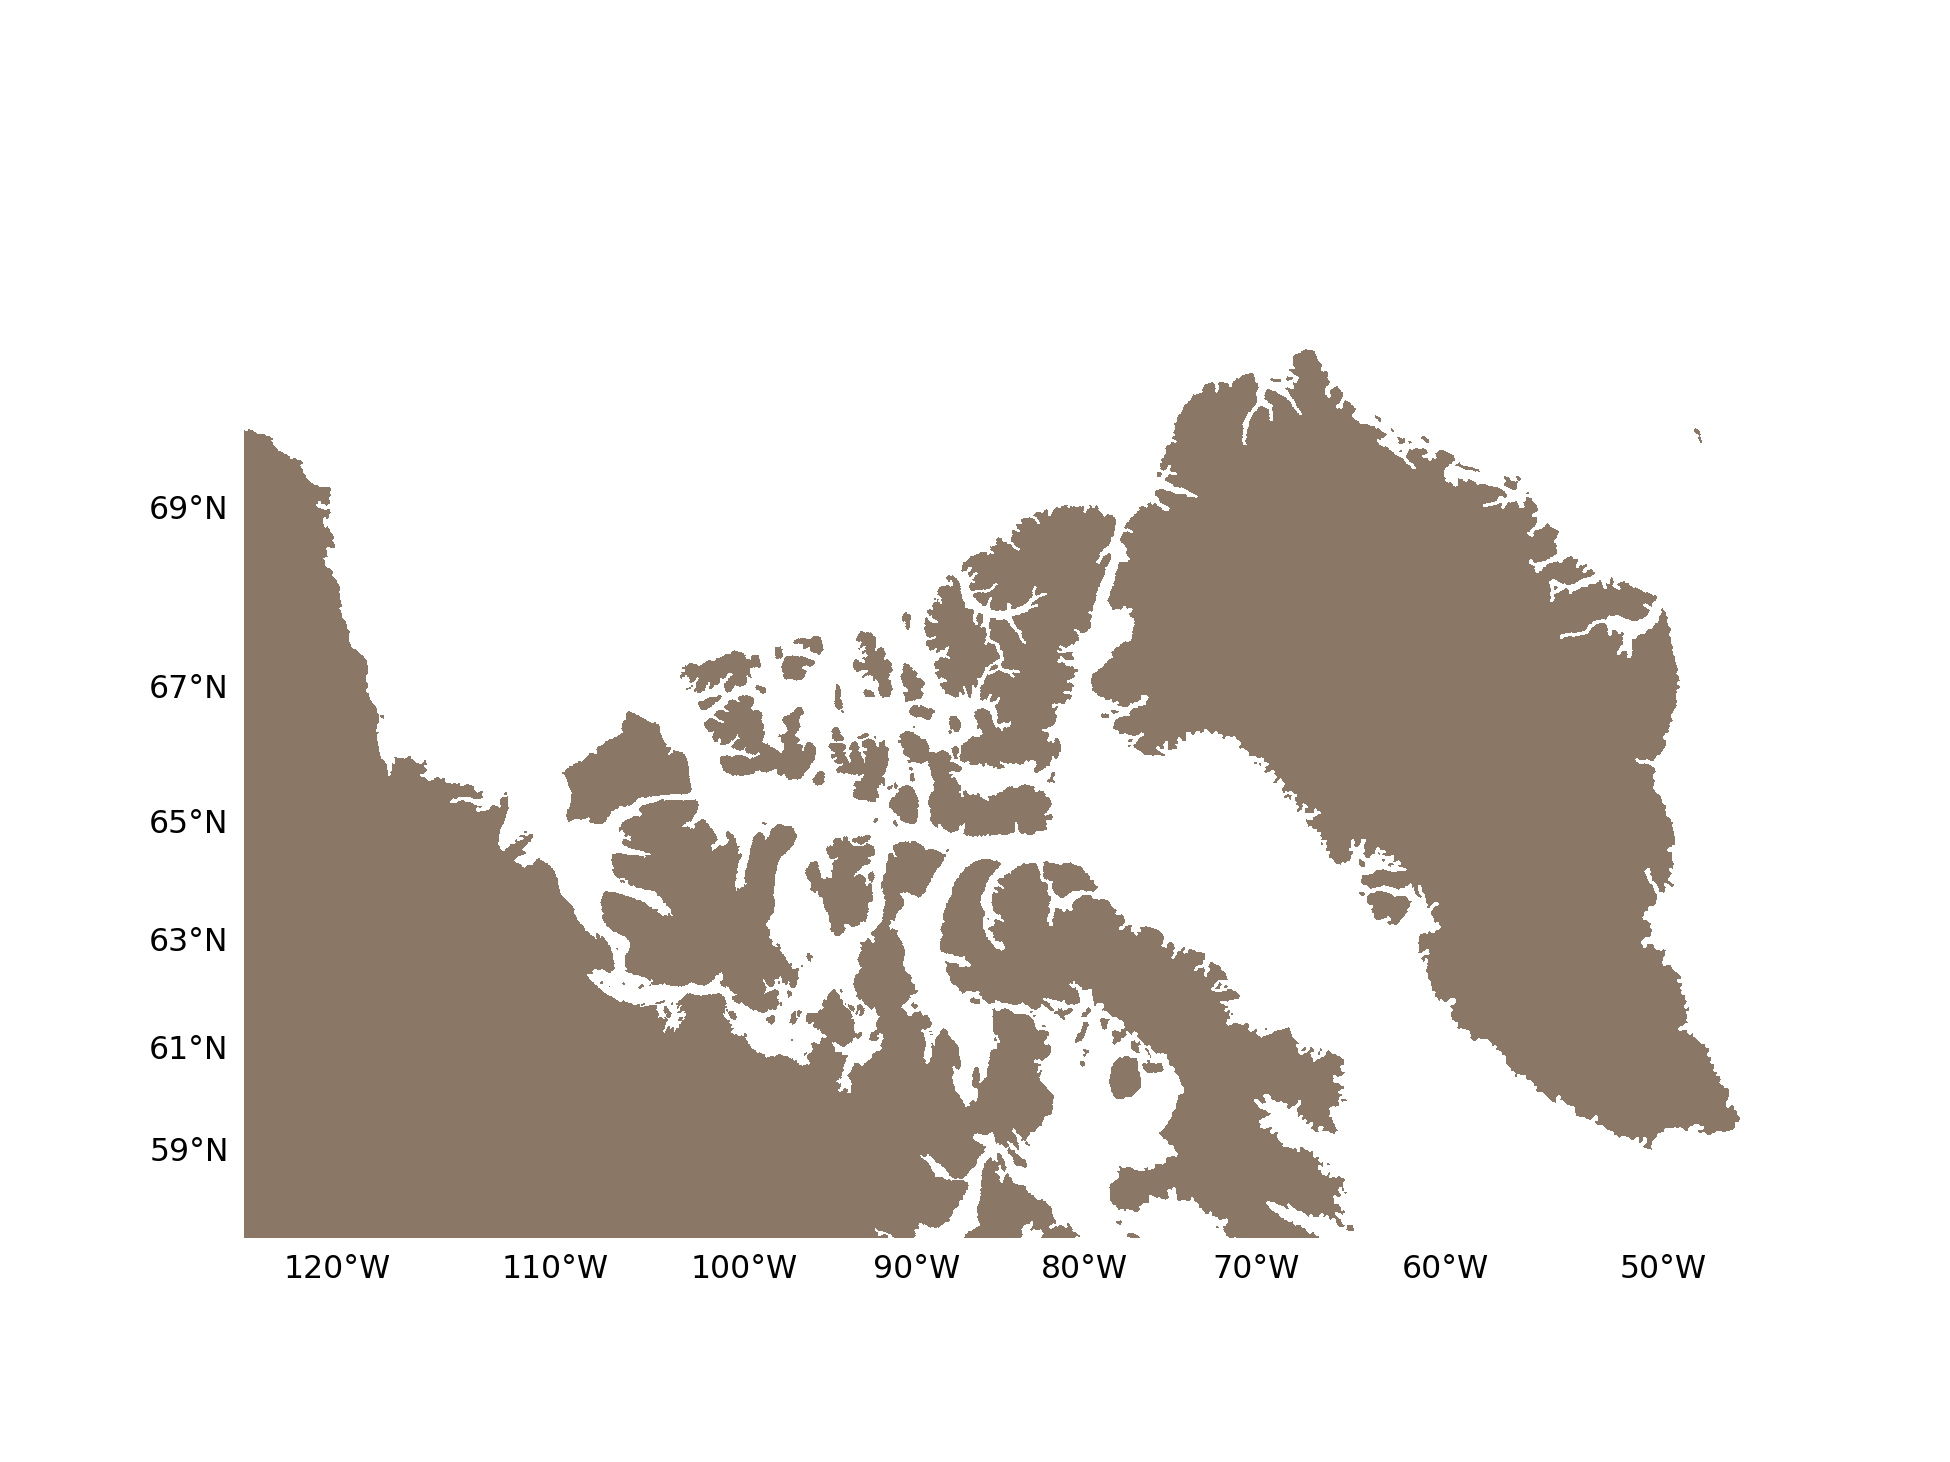

In [7]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('mn-reference.pickle','wb'))

Many subplots:

<IPython.core.display.Javascript object>


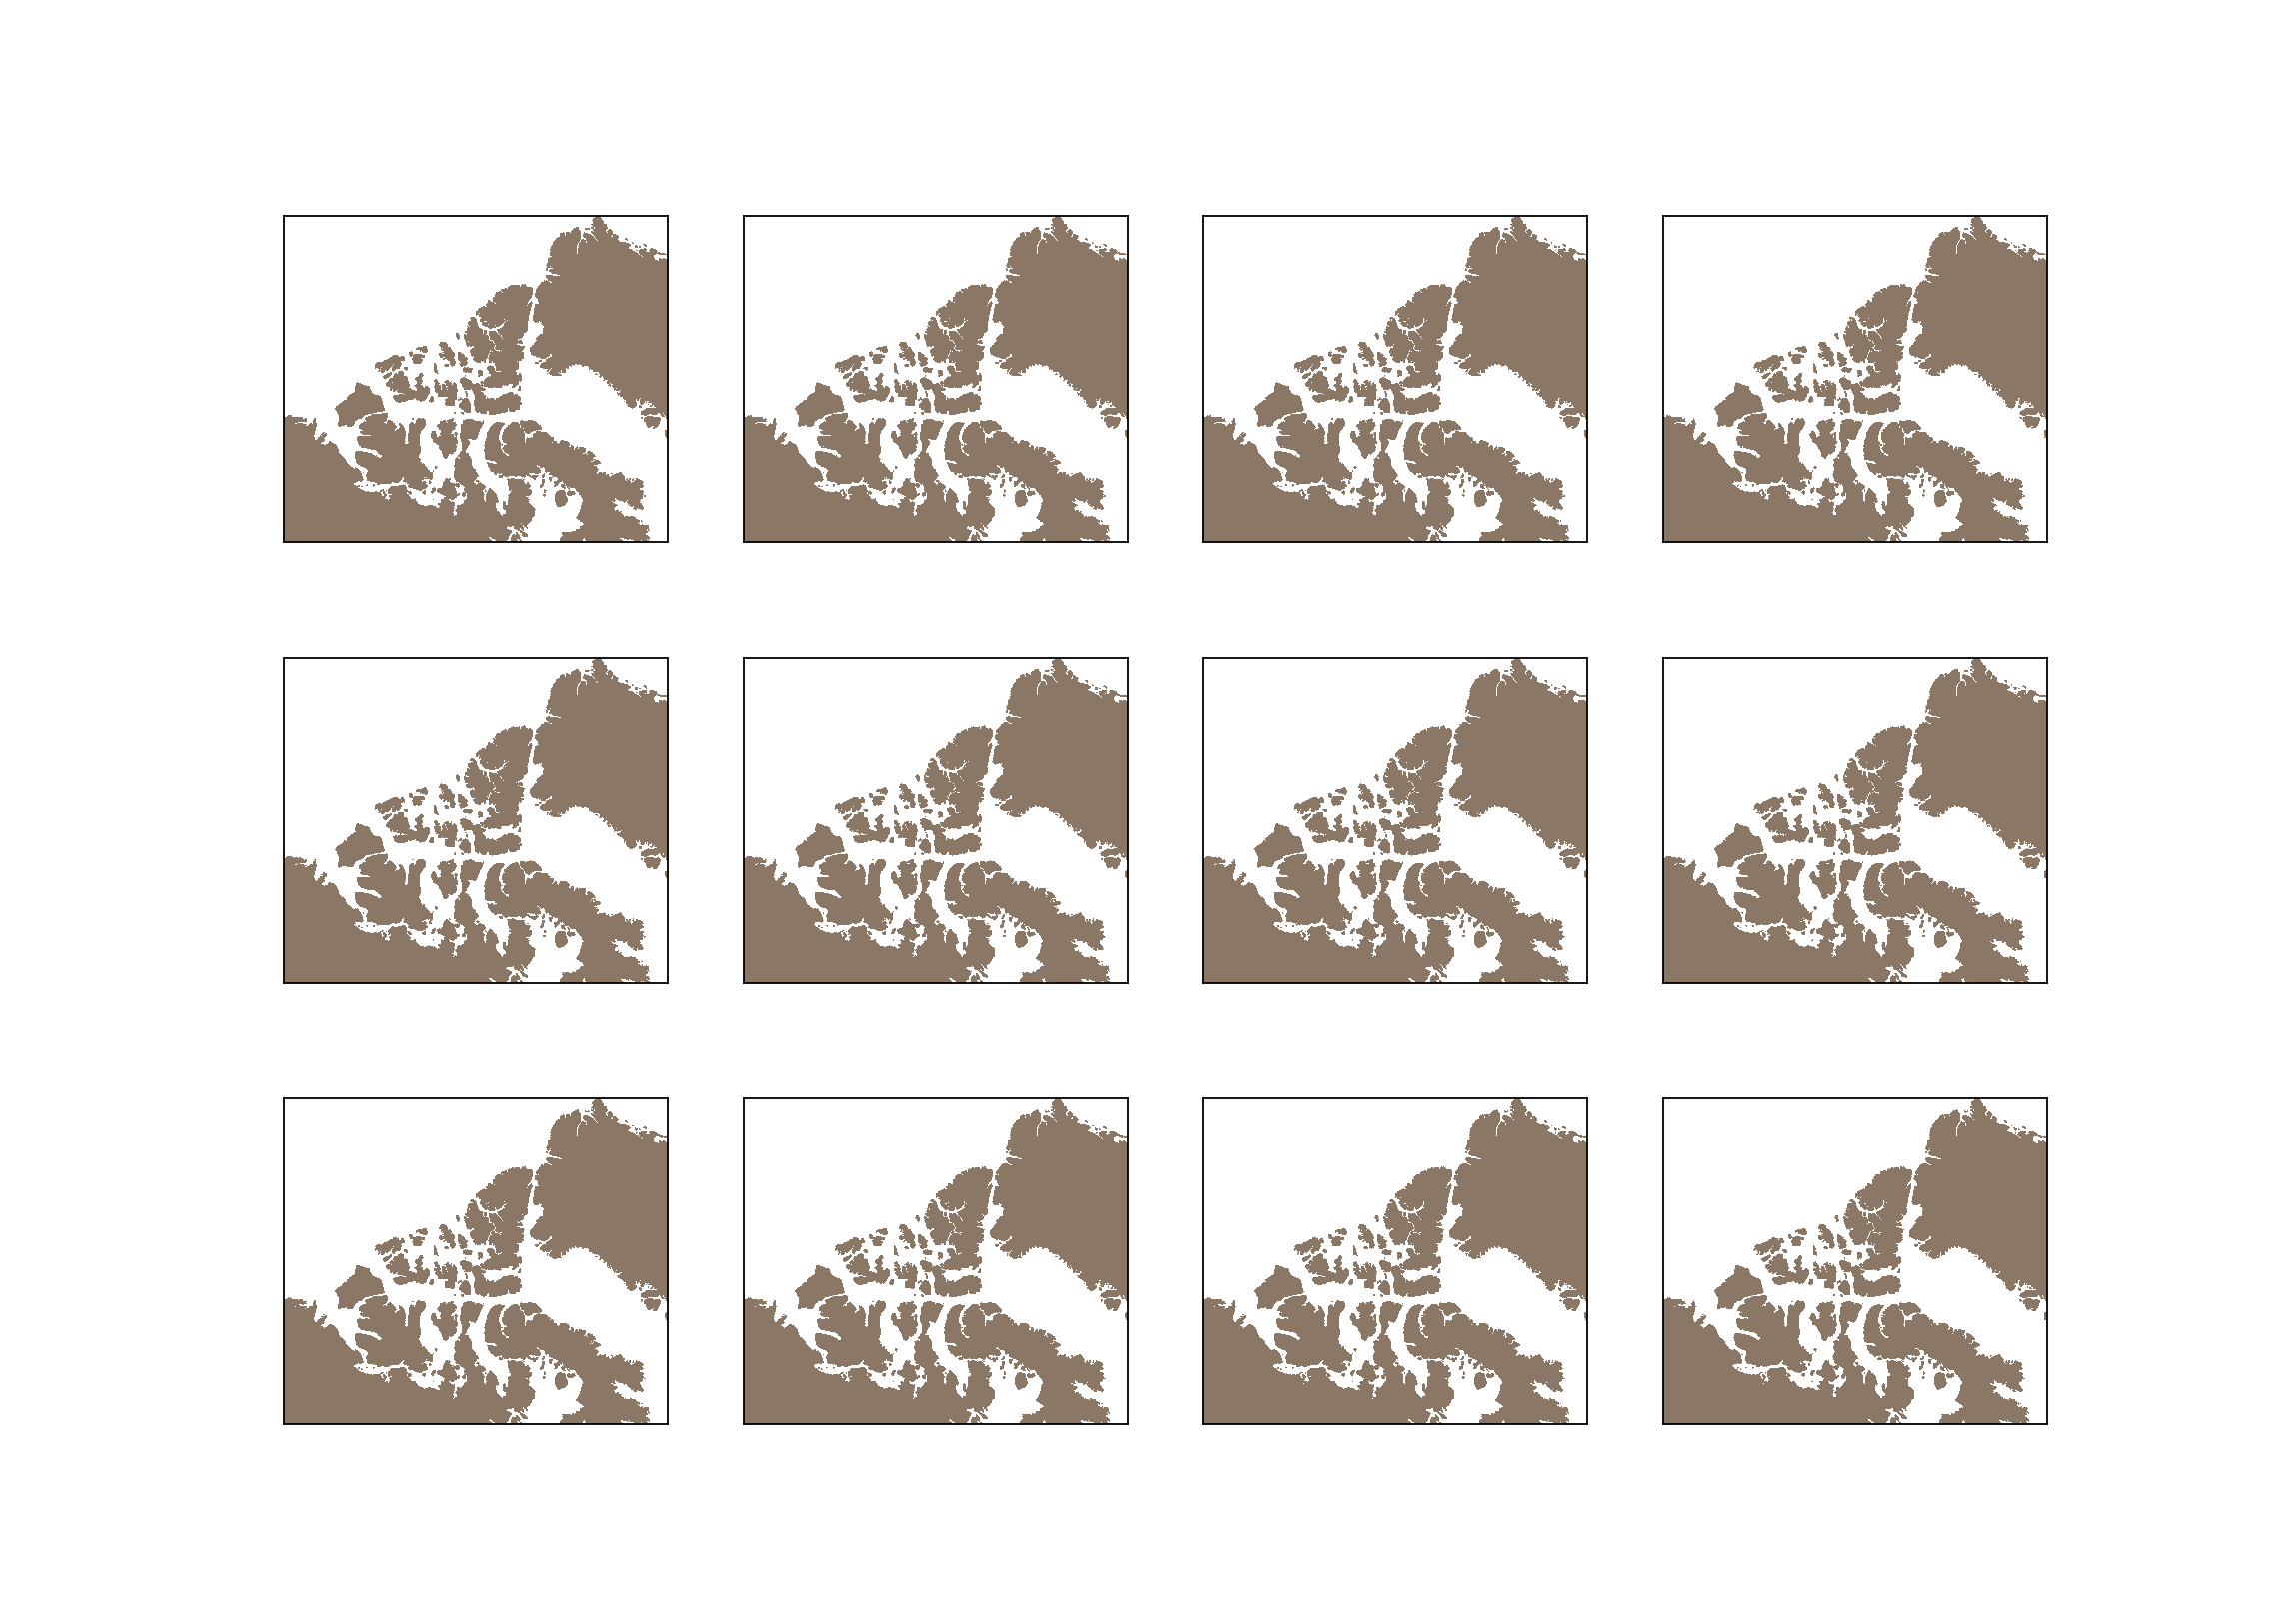

In [6]:
fig, ax = plt.subplots(3, 4, figsize=(14,10))

# plot 1 ---------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,0])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,1])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,2])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,3])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,0])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,1])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,2])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,3])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[2,0])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[2,1])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[2,2])
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[2,3])

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,3])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,3])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,3])

p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765") 
ax[0,0].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,0].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,0].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,1].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,1].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,1].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,2].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,2].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,2].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,3].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,3].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,3].add_patch(p) 
p = Polygon([(585585, 0),(585585, 191873),(905820, 191873),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")

# pickle the class instance.
pickle.dump((fig, ax, proj1),open('surface-Mn_subplots.pickle','wb'),-1)

Pb extended surface pickle:

<IPython.core.display.Javascript object>


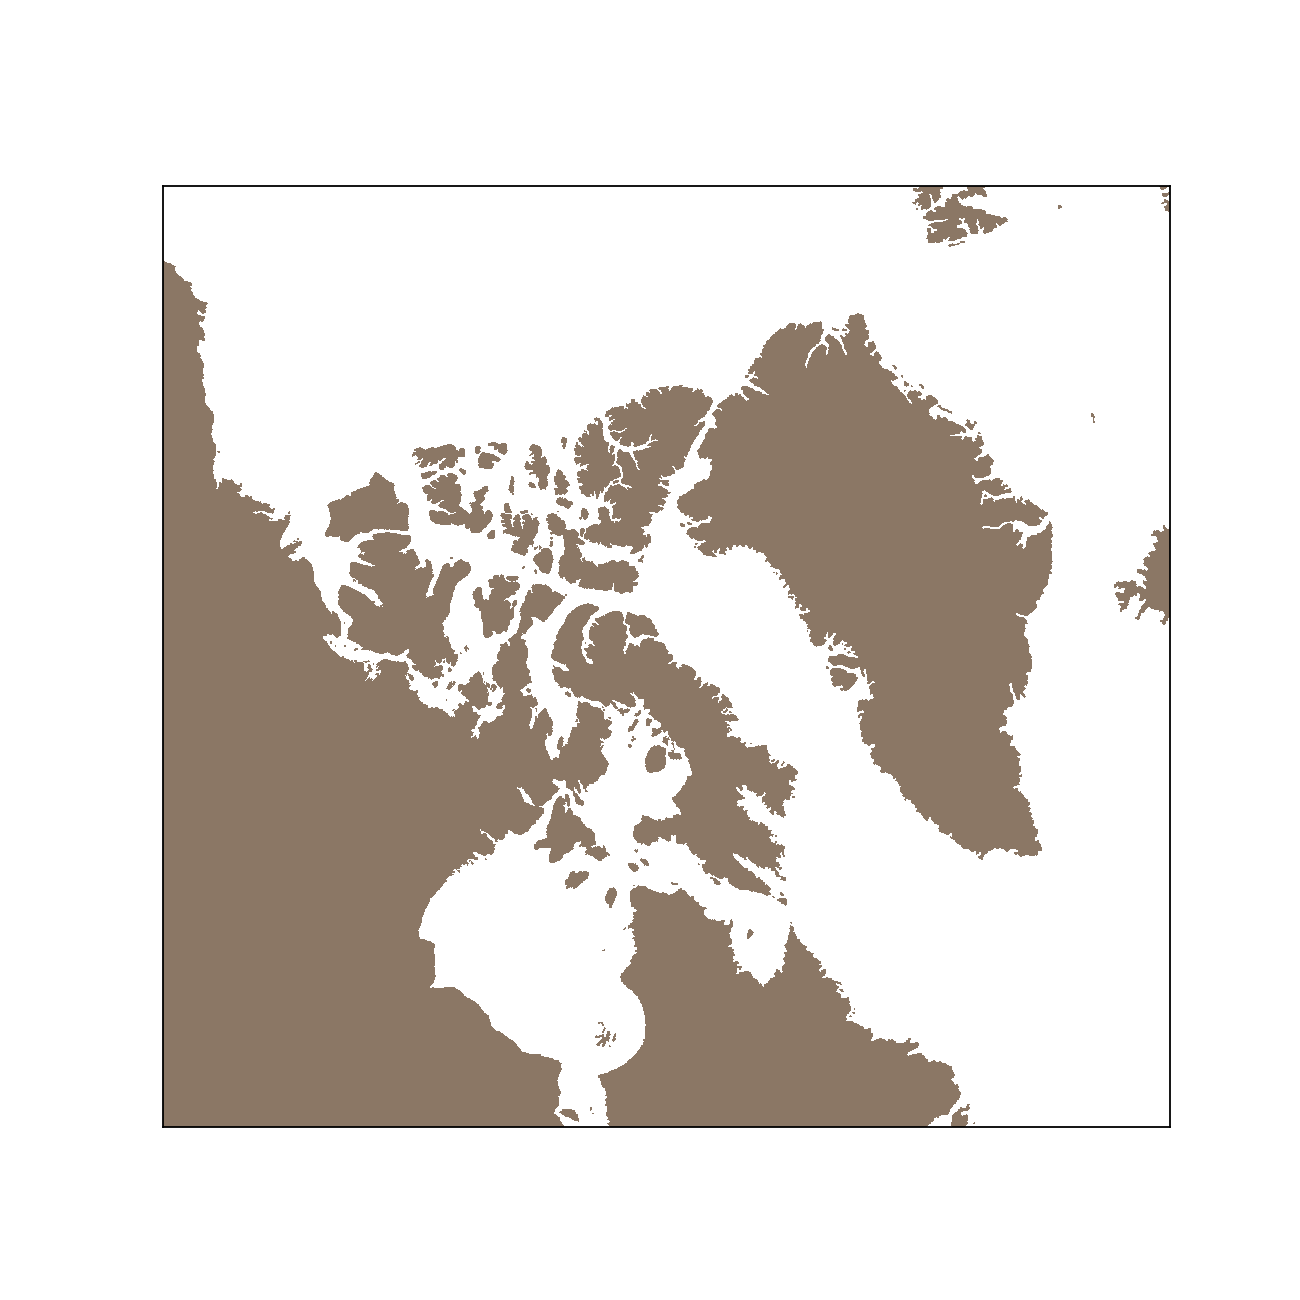

In [30]:
fig, ax1 = plt.subplots(figsize=(8,8))

proj1=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -75, resolution='i', width=4.6e6, height=4.3e6, ax=ax1)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

p = Polygon([(0,1.836e6),(986670, 1.885e6),(980955, 0),(0, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

# pickle the class instance.
pickle.dump(proj1,open('surface-Pb.pickle','wb'),-1)